In [36]:
from pybaseball import statcast as sc
from pybaseball import statcast_pitcher as sp
from pybaseball import team_pitching
from pybaseball import team_batting
from matplotlib import cm
from pybaseball import batting_stats
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

In [37]:
# create dataframe that iterates over several years of data, taking a sample month from each year.

dfs = pd.DataFrame([])
for year in range(2010, 2020):
    print(f"Starting year {year}")
    dfs = dfs.append(sc(start_dt=f'{year}-08-01', end_dt=f'{year}-09-01',verbose=False))
    
# create year column based on the game_date field
dfs['year'] = pd.DatetimeIndex(dfs['game_date']).year

  0%|          | 0/32 [00:00<?, ?it/s]

Starting year 2010


  0%|          | 0/32 [00:00<?, ?it/s]

Starting year 2011


  0%|          | 0/32 [00:00<?, ?it/s]

Starting year 2012


  0%|          | 0/32 [00:00<?, ?it/s]

Starting year 2013


  0%|          | 0/32 [00:00<?, ?it/s]

Starting year 2014


  0%|          | 0/32 [00:00<?, ?it/s]

Starting year 2015


  0%|          | 0/32 [00:00<?, ?it/s]

Starting year 2016


  0%|          | 0/32 [00:00<?, ?it/s]

Starting year 2017


  0%|          | 0/32 [00:00<?, ?it/s]

Starting year 2018


  0%|          | 0/32 [00:00<?, ?it/s]

Starting year 2019


100%|██████████| 32/32 [00:14<00:00,  2.17it/s]


In [38]:
# create data sets for both pitching and batting data from 1950 through 2019
pdata_d = team_pitching(1950,2019)
bdata_d = team_batting(1950,2019)

# drop any NA or NAN values to use for further analysis
pdata = pdata_d.dropna(subset=['K/9'])
bdata = bdata_d.dropna(subset=['AVG', 'HR', 'BB','R'])

In [39]:
# create data batting stats data frame for plate discipline analysis
#batdata = pd.DataFrame([])
batdata = batting_stats(2002,2020)

In [40]:
# get the average strikeout percentage across the league
strikeout_avg = pdata.groupby('Season', as_index=False)['K/9'].mean()

# get the mean batting average across the league
batting_avg = bdata.groupby('Season', as_index=False)['AVG'].mean()

# get league homerun totals by year
homeruns_avg = bdata.groupby('Season', as_index=False)['HR'].mean()

# get league runs totals by year
runs_avg = bdata.groupby('Season', as_index=False)['R'].mean()

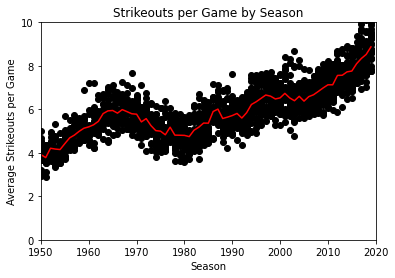

In [41]:
# show the average strikeouts per game by season
#scatter plot game data by season
plt.scatter(pdata['Season'], pdata['K/9'], c='black')
#plot season average in red as line
plt.plot(strikeout_avg['Season'], strikeout_avg['K/9'], c='red')
plt.xlim(1950,2020)
plt.ylim(0,10)
plt.xlabel('Season')
plt.ylabel('Average Strikeouts per Game')
plt.title('Strikeouts per Game by Season');
#save plot as png
#plt.savefig('ksper9.png') 

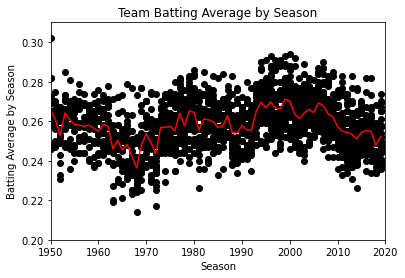

In [42]:
# show batting average per season against the league average
#scatter plot game data by season
plt.scatter(bdata['Season'], bdata['AVG'], c='black')
#plot season average in red as line
plt.plot(batting_avg['Season'], batting_avg['AVG'], c='red')
plt.xlim(1950,2020)
plt.ylim(0.2,.31)
plt.xlabel('Season')
plt.ylabel('Batting Average by Season')
plt.title('Team Batting Average by Season');
#save plot as png
#plt.savefig('battingavg.png') 

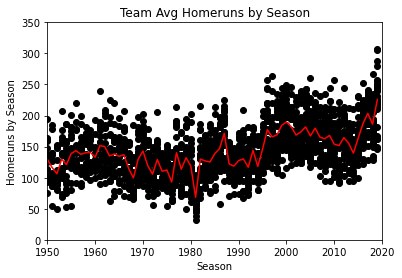

In [43]:
# show home run average per season against the league average
#scatter plot game data by season
plt.scatter(bdata['Season'], bdata['HR'], c='black')
#plot season average in red as line
plt.plot(homeruns_avg['Season'], homeruns_avg['HR'], c='red')
plt.xlim(1950,2020)
plt.ylim(0,350)
plt.xlabel('Season')
plt.ylabel('Homeruns by Season')
plt.title('Team Avg Homeruns by Season');
# save plot as png
#plt.savefig('teamHR.png') 

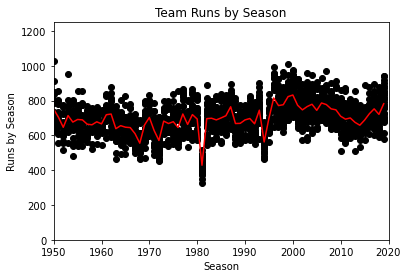

In [44]:
# show run average per season against the league average
#scatter plot game data by season
plt.scatter(bdata['Season'], bdata['R'], c='black')
#plot season average in red as line
plt.plot(homeruns_avg['Season'], runs_avg['R'], c='red')
plt.xlim(1950,2020)
plt.ylim(0,1250)
plt.xlabel('Season')
plt.ylabel('Runs by Season')
plt.title('Team Runs by Season');
# save plot as png
#plt.savefig('teamRuns.png') 

In [45]:
# create subset of the data that only contains fastballs
sub_ff = dfs[dfs["pitch_type"] == 'FF']
#aggergate data by year with each ff average
velo_avg = sub_ff.groupby('year', as_index=False)['release_speed'].mean()

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Num Pitches 95+')]

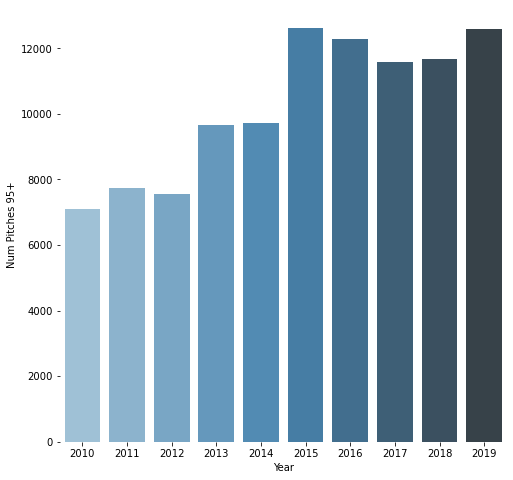

In [46]:
# create a copy of the fastball dataset
presults = sub_ff.copy()
# create a conditions and value filter to apply to the data set to create new column to represent total bases by hit
pitch_speed = [
    (sub_ff['release_speed'] > 95)
    ]

# create a list of the values we want to assign for each condition
values = [1]

# create a new column and use np.select to assign values to it using our lists as arguments
presults['95plus'] = np.select(pitch_speed, values)

# aggregate the number of pitches that are 95plus for each year
plus95 = presults.groupby('year', as_index=False)['95plus'].sum()

fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.barplot(x="year", y="95plus", data=plus95,
                 palette="Blues_d")
sns.despine(fig, left=True, bottom=True)
ax.set(xlabel='Year', ylabel='Num Pitches 95+')
#save plot as png
#plt.savefig('pitches95plus.png')

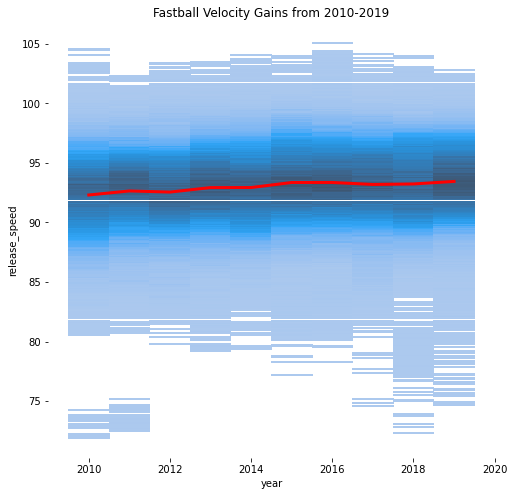

In [47]:
# Question 2
# create histogram by year and release speed to view trend
fig, ax = plt.subplots(figsize=(8, 8))
sns.despine(fig, left=True, bottom=True)
sns.histplot(
    sub_ff, x="year", y="release_speed",
    discrete=(True, False)
)
ax.set_title("Fastball Velocity Gains from 2010-2019");
#plot avg release speed per year as red line
ax.plot(velo_avg['year'], velo_avg['release_speed'], c='red', lw=3)
#plt.savefig('velocityff.png')

In [48]:
# create separate datasets to plot fastball locations at different intervals for comparison
# 2010 data
sub_ff_10 = dfs[(dfs["year"] == 2010)]
# 2015 data
sub_ff_15 = dfs[(dfs["year"] == 2015)]
# 2019 data
sub_ff_19 = dfs[(dfs["year"] == 2019)]


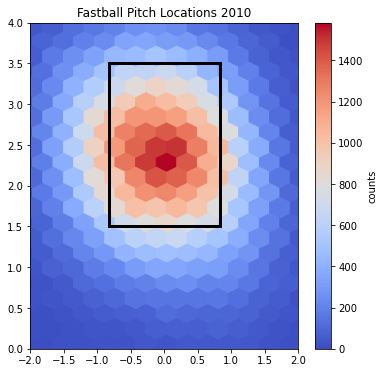

In [49]:
# Question 3
# create heatmap chart to show pitch locations 2010
fig, ax = plt.subplots(figsize=(6,6 ))
hb = ax.hexbin(sub_ff_10['plate_x'],sub_ff_10['plate_z'], gridsize=50, cmap='coolwarm')
ax.axis([-2, 2, 0, 4])
ax.set_title("Fastball Pitch Locations 2010")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')
#create batters box
ax.add_patch(Rectangle((-.83, 1.5), 1.66, 2
                      ,fill=False
                      ,edgecolor = 'black'
                      ,lw = 3))
#plt.savefig('2010loc.png')


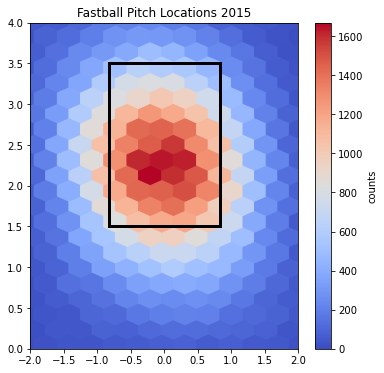

In [50]:
# create heatmap chart to show pitch locations 2015
fig, ax = plt.subplots(figsize=(6,6 ))
hb = ax.hexbin(sub_ff_15['plate_x'],sub_ff_15['plate_z'], gridsize=50, cmap='coolwarm')
ax.axis([-2, 2, 0, 4])
ax.set_title("Fastball Pitch Locations 2015")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')
#create batters box
ax.add_patch(Rectangle((-.83, 1.5), 1.66, 2
                      ,fill=False
                      ,edgecolor = 'black'
                      ,lw = 3))
#plt.savefig('2015loc.png')

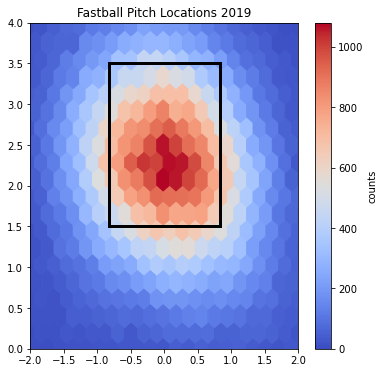

In [51]:
# create heatmap chart to show pitch locations 2019
fig, ax = plt.subplots(figsize=(6,6 ))
hb = ax.hexbin(sub_ff_19['plate_x'],sub_ff_19['plate_z'], gridsize=50, cmap='coolwarm')
ax.axis([-2, 2, 0, 4])
ax.set_title("Fastball Pitch Locations 2019")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')
#create batters box
ax.add_patch(Rectangle((-.83, 1.5), 1.66, 2
                      ,fill=False
                      ,edgecolor = 'black'
                      ,lw = 3))
#plt.savefig('2019loc.png')

In [52]:
# Question 4
# create averages for plotting in a line chart to show plate discipline measures
oswing = batdata.groupby('Season', as_index=False)['O-Swing%'].mean()
zswing = batdata.groupby('Season', as_index=False)['Z-Swing%'].mean()
zcon = batdata.groupby('Season', as_index=False)['Z-Contact%'].mean()
ocon = batdata.groupby('Season', as_index=False)['O-Contact%'].mean()
zone = batdata.groupby('Season', as_index=False)['Zone%'].mean()


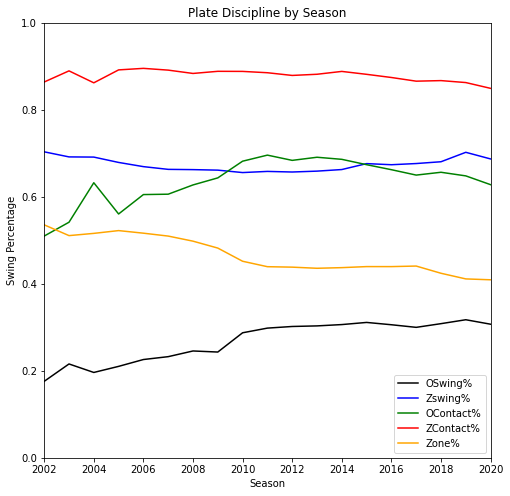

In [53]:
# show batting average per season against the league average
plt.subplots(figsize=(8, 8))
#plot individual line plots with different colors
plt.plot(oswing['Season'], oswing['O-Swing%'], c='black', label = 'OSwing%')
plt.plot(zswing['Season'], zswing['Z-Swing%'], c='blue', label = 'Zswing%')
plt.plot(ocon['Season'], ocon['O-Contact%'], c='green', label = 'OContact%')
plt.plot(zcon['Season'], zcon['Z-Contact%'], c='red', label = 'ZContact%')
plt.plot(zone['Season'], zone['Zone%'], c='orange', label = 'Zone%')
plt.xlim(2002,2020)
plt.ylim(0,1)
plt.xlabel('Season')
plt.ylabel('Swing Percentage')
plt.legend()
plt.title('Plate Discipline by Season');
#plt.savefig('swing.png') 

In [54]:
# Question 5 - Has launch angled increased?

# remove NA's since all pitches dont have a batted ball result
launch = dfs.dropna(subset=['launch_angle', 'estimated_ba_using_speedangle','estimated_woba_using_speedangle'])


In [55]:
# Question 5b - What has been the affect?
results = launch.copy()
#results['HR'] = results.events.IsIn('home_run')

# create a conditions and value filter to apply to the data set to create new column to represent total bases by hit
conditions = [
    (results['events'] == 'home_run'),
    (results['events'] == 'triple'),
    (results['events'] == 'double'),
    (results['events'] == 'single')
    ]

# create a list of the values we want to assign for each condition
values = [4,3,2,1]

# create a new column and use np.select to assign values to it using our lists as arguments
results['xbh'] = np.select(conditions, values)

Text(0.5, 1.0, 'Results by Launch Angle and Exit Velocity')

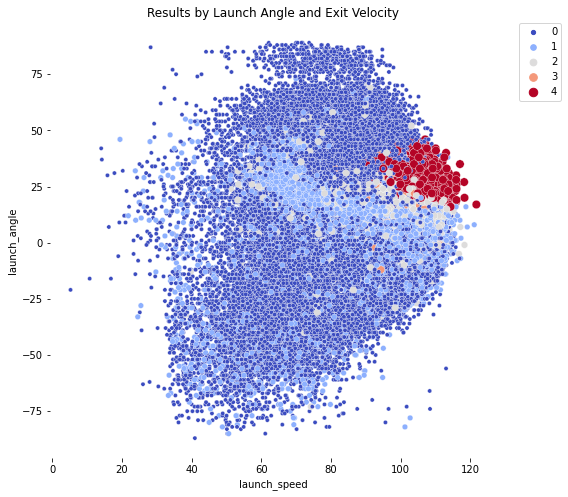

In [56]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.despine(fig, left=True, bottom=True)
sns.scatterplot(x="launch_speed", y="launch_angle",
                hue="xbh", 
                size = 'xbh',
                palette='coolwarm', 
                data=results, ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Results by Launch Angle and Exit Velocity')
#plt.savefig('launch.png')